## Basit Doğrusal Regrasyon

### Model

In [123]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df=pd.read_csv("Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


C:\Users\BAYDIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


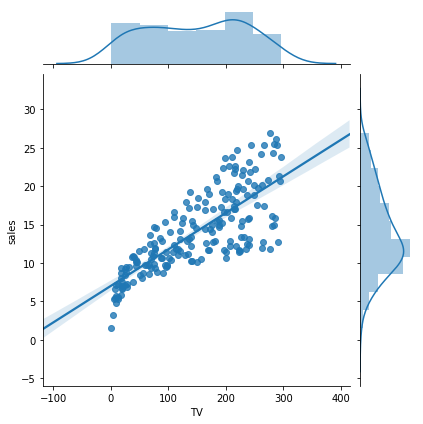

In [125]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
X=df[["TV"]]

In [128]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [129]:
y=df[["sales"]]

In [130]:
reg = LinearRegression()

In [131]:
model =reg.fit(X,y)

In [132]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)'

In [134]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [135]:
model.intercept_ #bo

array([7.03259355])

In [136]:
model.coef_ #b1

array([[0.04753664]])

In [137]:
#rkare
model.score(X,y)

0.611875050850071

## Tahmin

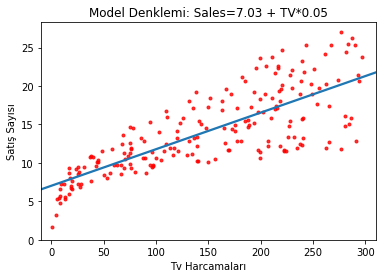

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales=7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("Tv Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales = 7.03 + 0.05*TV

In [139]:
7.03+0.05*165

15.280000000000001

In [140]:
model.intercept_+model.coef_*165

array([[14.87613922]])

In [141]:
model.predict([[165]])

array([[14.87613922]])

In [142]:
yeni_veri=[[5],[15],[30]]

In [143]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

### MSE : Hata Kareler Ortalaması
### RMSE : Hata Kareler Ortalamasının Karekökü

In [144]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [145]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [146]:
gercek_y=y[0:10]

In [147]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10])

In [148]:
hatalar= pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [149]:
hatalar.columns=["gercek_y","tahmin_edilen_y"]

In [150]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [151]:
hatalar["hata"]=hatalar["gercek_y"]-hatalar["tahmin_edilen_y"]

In [152]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [153]:
hatalar["hata_kareler"]=hatalar["hata"]**2

In [154]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [155]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638105

## Çoklu Doğrusal Regresyon

Model

In [156]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df=pd.read_csv("Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [157]:
X=df.drop('sales',axis=1)

In [158]:
y=df[["sales"]]

In [159]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [160]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [161]:
# Statsmodels ile model kurmak

In [162]:
import statsmodels.api as sm

In [163]:
lm=sm.OLS(y,X)

In [164]:
model=lm.fit()

In [165]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Thu, 11 Feb 2021   Prob (F-statistic):          2.43e-171
Time:                        14:33:51   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
##scikit learn ile model kurmak

In [167]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [168]:
model=lm.fit(X,y)

In [169]:
model.intercept_

array([2.93888937])

In [170]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

### Tahmin
#### Sales = 2.94+TV*0.04+radio*0.19-newspaper*0.0001

30 birim TV, 10 birim radio, 40 birim gazete

In [171]:
2.94+30*0.04+10*0.19-40*0.001

5.999999999999999

In [172]:
yeni_veri=[[30],[10],[40]]

In [173]:
import pandas as pd
yeni_veri=pd.DataFrame(yeni_veri).T

In [174]:
yeni_veri

,0,1,2
0,30,10,40


In [175]:
model.predict(yeni_veri)

array([[6.15562918]])

In [176]:
from sklearn.metrics import mean_squared_error

In [177]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [178]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [179]:
MSE=mean_squared_error(y,model.predict(X))
MSE

2.784126314510936

In [180]:
import numpy as np
RMSE=np.sqrt(MSE)
RMSE

1.6685701407225697

## Model Tuning ( Model Doğrulama)

In [181]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [182]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [183]:
#sinama seti

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1) # 80 lik train 20lik test

In [186]:
X_train.head()

,TV,radio,newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4


In [187]:
y_train.head()

,sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5


In [188]:
X_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [189]:
y_test.head()

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


In [190]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [191]:
#eğitim hatası
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.7369025901470923

In [192]:
#test hatası
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

1.4113417558581578

In [193]:
#k-katlı cv

In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")

array([-1.62375953, -3.81875608, -3.43828142, -2.27748673, -7.25325414,
       -1.88303708, -2.80517715, -3.68594486, -1.12810834, -3.96330989])

In [196]:
#cv mse
np.mean(-cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error"))

3.1877115209443576

In [197]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")))

1.7854163438661463

In [198]:
#cv rmse #çapraz doğrulama işleminde test seti dışarda kalmalı (kendi içinde 10 parçaya bölüp deniyor)
np.sqrt(np.mean(-cross_val_score(model,X,y,cv=10,scoring="neg_mean_squared_error")))

1.749276312684338

## Ridge Regresyon

### Gerekli kütüphaneler

In [199]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

### Veri Seti

In [200]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])

y=df["Salary"]
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.25,
                                                 random_state=42)

FileNotFoundError: File b'Hitters.csv' does not exist

In [201]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [202]:
df.shape

(200, 4)

In [203]:
ridge_model = Ridge(alpha=5).fit(X_train,y_train)

In [204]:
ridge_model

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [205]:
ridge_model.coef_

array([[0.04684315, 0.17851535, 0.00259463]])

In [206]:
ridge_model.intercept_

array([2.90836364])

In [207]:
lambdalar=10**np.linspace(10,-2,100)*0.5

In [208]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [209]:
ridge_model=Ridge()
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

In [210]:
katsayilar

[array([[1.20347175e-05, 1.48252491e-06, 9.93496058e-07]]),
 array([[1.59079335e-05, 1.95978753e-06, 1.31331224e-06]]),
 array([[2.10271596e-05, 2.59068332e-06, 1.73606719e-06]]),
 array([[2.77928373e-05, 3.42466020e-06, 2.29488378e-06]]),
 array([[3.67338041e-05, 4.52707576e-06, 3.03353555e-06]]),
 array([[4.85482390e-05, 5.98431200e-06, 4.00986591e-06]]),
 array([[6.41575008e-05, 7.91053144e-06, 5.30030095e-06]]),
 array([[8.47767925e-05, 1.04565989e-05, 7.00580255e-06]]),
 array([[1.12007696e-04, 1.38218591e-05, 9.25971614e-06]]),
 array([[1.47958964e-04, 1.82696779e-05, 1.22381069e-05]]),
 array([[1.95403553e-04, 2.41479375e-05, 1.61733576e-05]]),
 array([[2.57981601e-04, 3.19160439e-05, 2.13720291e-05]]),
 array([[3.40460824e-04, 4.21804816e-05, 2.82382722e-05]]),
 array([[4.49067097e-04, 5.57415594e-05, 3.73044348e-05]]),
 array([[5.91898124e-04, 7.36547648e-05, 4.92709326e-05]]),
 array([[7.79430644e-04, 9.73111214e-05, 6.50579506e-05]]),
 array([[1.02512425e-03, 1.28542140e-04,

ValueError: x and y can be no greater than 2-D, but have shapes (100,) and (100, 1, 3)

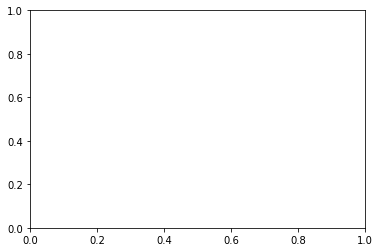

In [211]:
ax=plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

### Tahmin

In [212]:
ridge_model =Ridge().fit(X_train,y_train)
#model kurduk, parametre optimasyonu yapmadan train seti üzerine kurduk

In [213]:
y_pred = ridge_model.predict(X_train)
#train seti icin bir tahmin etme islemi yaptık,y bağımlı değişkenlerini tahmin ettik.X bağımsız değişkenlerini kullanarak

In [214]:
y_pred[0:10] #tahmin edilen bağımlı değişkenler

array([[ 3.65934012],
       [ 7.25624793],
       [ 6.00486918],
       [18.46166982],
       [ 8.37405614],
       [14.12452034],
       [15.01604721],
       [20.40197496],
       [20.61367896],
       [19.6173398 ]])

In [215]:
y_train[0:10] # gerçek bağımlı değişkneler

,sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5
19,14.6
114,14.6
39,21.5
185,22.6
124,19.7


In [216]:
#train hatası #kıyaslama
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
RMSE #dogrulanmamis

1.7369025920017278

In [217]:
#daha dogru hata-hata dusuk olmasi her zaman dogru oldu anlamina gelmez
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")))

1.7854159648839285

In [218]:
#test hatası #test setinde başarımızı denedik
y_pred=ridge_model.predict(X_test)

In [219]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE
#karsilastirma tahmin ile gerçeği

1.4113811094604456

 ### Model Tuning

#### Neden Model Tuning?

In [220]:
ridge_model= Ridge(1).fit(X_train,y_train) #lambda değeri değişrilebiliyor
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.4113811094604456

In [221]:
np.random.randint(0,1000,100)

array([ 58, 526, 399, 345, 330, 373, 877, 951, 503, 783, 493, 344,  14,
       611, 528, 785, 719, 873, 346, 265, 957, 114, 345, 808,  40, 641,
       653, 673,  99, 283, 814, 361, 822, 251, 445,  98, 851, 117, 514,
       466, 456, 291, 184, 152, 538, 817, 773, 455, 421, 719, 967,  31,
       110, 968, 922, 271, 627, 936,   5, 676, 239, 654, 871, 218,  42,
       868, 194, 234, 349, 180, 108, 993, 234, 721,  32, 800, 620, 182,
       153, 801, 487, 735, 439, 660, 952, 867, 782, 828, 328, 512, 334,
       315, 340, 398, 749, 633, 579, 758, 420, 344])

In [222]:
lambdalar1 = np.random.randint(0,1000,100)

In [223]:
lambdalar2= 10**np.linspace(10,-2,100)*0.5

In [224]:
ridgecv = RidgeCV(alphas = lambdalar2,scoring="neg_mean_squared_error",cv=10,normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000e+09, 3.78232e+09, ..., 6.60971e-03, 5.00000e-03]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [225]:
ridgecv=RidgeCV(alphas = lambdalar2,scoring="neg_mean_squared_error",cv=10,normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000e+09, 3.78232e+09, ..., 6.60971e-03, 5.00000e-03]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [226]:
ridgecv.alpha_

0.005

In [227]:
#final modeli

In [228]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train,y_train)

In [229]:
#final modeli
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.411341952624494

### Lasso Regresyon

#### Gerekli kütüphaneler

In [230]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,LassoCV

### Veri Seti

In [239]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')

X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [240]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [241]:
df.shape

(263, 20)

In [242]:
lasso_model = Lasso().fit(X_train,y_train)

C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [243]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [244]:
lasso_model.intercept_

-5.587450677336847

In [245]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [246]:
#farklı lambda degerlerine karsilik katsayilar

In [247]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

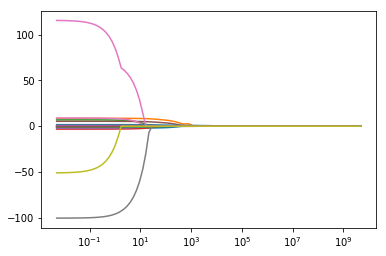

In [248]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

### Tahmin

In [249]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [250]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [251]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [252]:
y_pred = lasso_model.predict(X_test)

In [253]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.09758845540324

In [255]:
r2_score(y_test,y_pred) #bağımsız değişkenlerce bağımlı değişkendeki değişikliğin açıklanma yüzdesidir

0.414227981323662

### Model Tuning

In [266]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [267]:
lasso_cv_model = LassoCV(alphas=alphas,cv=10,max_iter=100000).fit(X_train,y_train)

In [268]:
lasso_cv_model.alpha_

201.85086292982749

In [269]:
lasso_tuned = Lasso().set_params(alpha= lasso_cv_model.alpha_).fit(X_train,y_train)

In [270]:
lasso_tuned = Lasso(alpha= lasso_cv_model.alpha_).fit(X_train,y_train)

In [271]:
y_pred = lasso_tuned.predict(X_test)

In [272]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.6832708037446

In [273]:
pd.Series(lasso_tuned.coef_,index=X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

### ElastikNet Regresyon Modeli

#### Gerekli Kütüphaneler

In [275]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,LassoCV,ElasticNetCV

#### Veri Seti

In [276]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')

X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [277]:
enet_model= ElasticNet().fit(X_train,y_train)

C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [278]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [279]:
enet_model.intercept_

-6.465955602113013

In [280]:
#tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [281]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [282]:
y_pred = enet_model.predict(X_test)

In [283]:
np.sqrt(mean_squared_error(y_test,y_pred)) #test hatası

357.16765481812433

In [284]:
r2_score(y_test,y_pred)

0.41070222469326956

### Model Tuning

In [296]:
alphas=10**np.linspace(10,-2,100)*0.5

In [297]:
enet_cv_model = ElasticNetCV(alphas=alphas,cv=10).fit(X_train,y_train)

C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\BAYDIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

In [298]:
enet_cv_model.alpha_

5748.784976988678

In [299]:
enet_cv_model.intercept_

-31.46312122564109

In [300]:
enet_cv_model.coef_

array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [301]:
#final modeli

In [302]:
enet_tuned = ElasticNet(alpha= enet_cv_model.alpha_).fit(X_train,y_train)

In [303]:
y_pred=enet_tuned.predict(X_test)

In [304]:
np.sqrt(mean_squared_error(y_test,y_pred))

393.97530658505536

In [295]:
?ElasticNet

Init signature: ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read more in the :ref:`User Guide <elastic_net>`.

Parameters
